In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
data=data.dropna()
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   18285 non-null  int64 
 1   id      18285 non-null  int64 
 2   title   18285 non-null  object
 3   author  18285 non-null  object
 4   text    18285 non-null  object
 5   label   18285 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 857.2+ KB


In [6]:
X=data.drop(["label"],axis=1)
y=data["label"]

In [7]:
X.shape,y.shape

((18285, 5), (18285,))

### Preprocessing the text data

In [8]:
messages=X.copy()
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review= re.sub("[^a-zA-Z]"," ",messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [9]:
vocab_size=5000
one_hot_rep=[]
for words in corpus:
    one_hot_rep.append(one_hot(words,vocab_size))
one_hot_rep

[[2594, 611, 1275, 4009, 4555, 3951, 3277, 2810, 2083, 1418],
 [2198, 3256, 2413, 1471, 1694, 2748, 2861],
 [3589, 4870, 3510, 3154],
 [2190, 3933, 716, 1073, 4160, 1192],
 [3218, 1694, 773, 3454, 4830, 3770, 1694, 1062, 3045, 133],
 [3720,
  2667,
  4263,
  4482,
  54,
  1287,
  3050,
  1924,
  4347,
  4104,
  884,
  3141,
  1369,
  1264,
  2861],
 [4518, 1003, 193, 2696, 3428, 3010, 1871, 1323, 4798, 3256, 1684],
 [1607, 2958, 3996, 1449, 3818, 869, 1287, 1536, 4798, 3256, 1684],
 [2500, 3622, 3428, 639, 2815, 4952, 2280, 4445, 1287, 3471],
 [3206, 1345, 4906, 3186, 3285, 853, 1894, 2623],
 [900, 1260, 216, 4407, 4012, 724, 2691, 669, 1403, 2892, 2347],
 [1073, 1234, 4555, 4952, 1287, 3818],
 [2695, 1933, 3620, 3605, 1203, 1916, 3927, 4026, 1758],
 [3615, 2260, 1623, 4820, 1923, 3548, 3615, 4798, 3256, 1684],
 [2433, 1069, 3310, 3800, 1842, 4798, 3256, 1684],
 [1941, 1177, 956, 541, 623, 4493, 549, 2582, 3904, 530],
 [3595, 3185, 3256],
 [1105, 4212, 331, 3513, 1287, 4365, 1366, 2861

In [10]:
#one_hot_rep1 = [one_hot(words, vocab_size) for words in corpus]
#one_hot_rep1

In [11]:
length=20
embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=length)
print(embedded_docs)

[[   0    0    0 ... 2810 2083 1418]
 [   0    0    0 ... 1694 2748 2861]
 [   0    0    0 ... 4870 3510 3154]
 ...
 [   0    0    0 ... 4798 3256 1684]
 [   0    0    0 ...  884 4127 4650]
 [   0    0    0 ... 3327 4277 4971]]


### Model 

In [12]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
         

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7919 - loss: 0.4295 - val_accuracy: 0.9084 - val_loss: 0.2091
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9329 - loss: 0.1597 - val_accuracy: 0.9190 - val_loss: 0.2092
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9595 - loss: 0.1052 - val_accuracy: 0.9109 - val_loss: 0.2285
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9739 - loss: 0.0744 - val_accuracy: 0.9127 - val_loss: 0.2483
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9153 - val_loss: 0.3065
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9135 - val_loss: 0.3318
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.9079 - val_loss: 0.4747
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accu

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_predict=model.predict(X_test)
y_predict=np.round(y_predict).astype(int)
confusion_matrix(y_test,y_predict)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[3151,  268],
       [ 307, 2309]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the results
print(cm)
print(accuracy)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[3151  268]
 [ 307 2309]]
0.9047224523612262


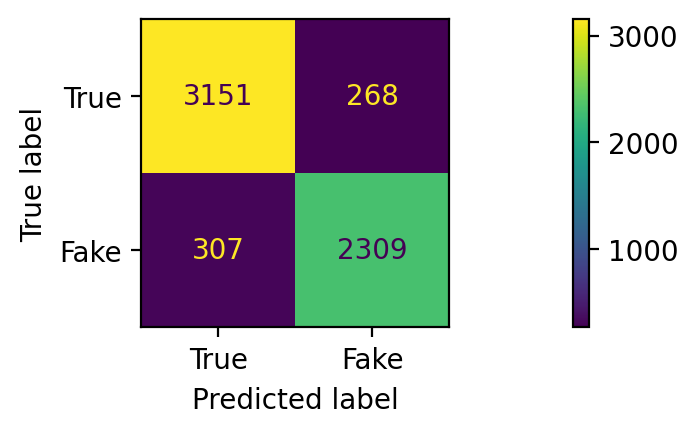

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (16,2)
plt.rcParams['figure.dpi'] = 200
disp = ConfusionMatrixDisplay(cm, display_labels=['True', 'Fake'])
disp.plot()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(corpus).toarray()

In [36]:
from sklearn.model_selection import train_test_split

# Update the train-test split with TF-IDF features
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_final, test_size=0.33, random_state=42)


In [37]:
from tensorflow.keras.layers import Dropout

# Updated Model Architecture
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Additional Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with a learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7552 - loss: 0.4432 - val_accuracy: 0.9200 - val_loss: 0.2067
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9662 - loss: 0.0944 - val_accuracy: 0.9181 - val_loss: 0.2187
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9885 - loss: 0.0398 - val_accuracy: 0.9168 - val_loss: 0.2754
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9965 - loss: 0.0158 - val_accuracy: 0.9107 - val_loss: 0.3530
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9140 - val_loss: 0.4012
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 1.0000 - loss: 9.2181e-04 - val_accuracy: 0.9120 - val_loss: 0.4471
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9133 - val_loss: 0.4565
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9999 - loss: 7.2954e-04 - 

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)


# Displaying the results
print(cm)
print(accuracy)


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[3125  294]
 [ 236 2380]]
0.9121789560894781


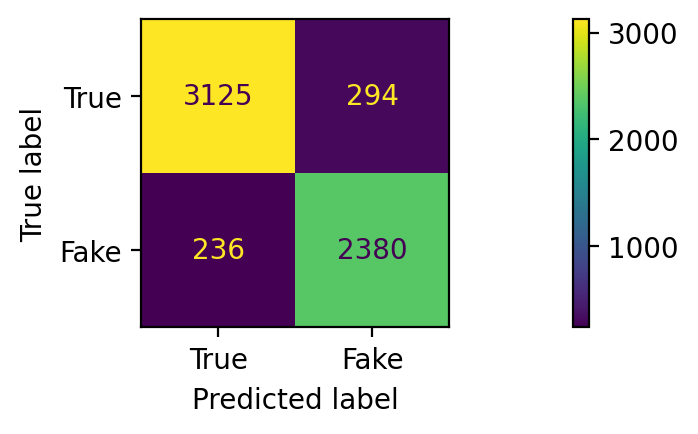

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (16,2)
plt.rcParams['figure.dpi'] = 200
disp = ConfusionMatrixDisplay(cm, display_labels=['True', 'Fake'])
disp.plot()